<a href="https://colab.research.google.com/github/hamzafarooq/multi-agent-course/blob/main/Module_5/Agents/Agent%20Pro%20from%20Scratch%20%5Bold%20version%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib fpdf qiskit python-pptx openai --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.0 MB/s eta 0:00:00


In [ ]:
!pip install yfinance==0.2.54

In [ ]:
from openai import OpenAI
import os
from google.colab import userdata
import base64
import requests
from PIL import Image
from io import BytesIO


os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [ ]:

import subprocess
import tempfile
import re
import importlib
import sys

class AgentPro:


    def generate_code(self, prompt):
        client = OpenAI()
        response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
          {"role": "system", "content": "You are a Python code generator. Respond only with executable Python code, no explanations or comments except for required pip installations at the top."},
          {"role": "user", "content": f"Generate Python code to {prompt}. If you need to use any external libraries, include a comment at the top of the code listing the required pip installations."}
        ],
        max_tokens=4000,
        temperature=0.7,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
        )
        code = re.sub(r'^```python\n|^```\n|```$', '', response.choices[0].message.content, flags=re.MULTILINE)
        code_lines = code.split('\n')
        while code_lines and not (code_lines[0].startswith('import') or code_lines[0].startswith('from') or code_lines[0].startswith('#')):
            code_lines.pop(0)

        return '\n'.join(code_lines)

        #return


    def install_libraries(self, code):
        libraries = re.findall(r'#\s*pip install\s+([\w-]+)', code)
        if libraries:
            print("Installing required libraries...")
            for lib in libraries:
                try:
                    importlib.import_module(lib.replace('-', '_'))
                    print(f"{lib} is already installed.")
                except ImportError:
                    print(f"Installing {lib}...")
                    subprocess.check_call([sys.executable, "-m", "pip", "install", lib])
            print("Libraries installed successfully.")


    def execute_code(self, code):
        with tempfile.NamedTemporaryFile(mode='w', suffix='.py', delete=False) as temp_file:
            temp_file.write(code)
            temp_file_path = temp_file.name

        try:
            result = subprocess.run(['python', temp_file_path], capture_output=True, text=True, timeout=30)
            output = result.stdout
            error = result.stderr
        except subprocess.TimeoutExpired:
            output = ""
            error = "Execution timed out after 30 seconds."
        finally:
            os.unlink(temp_file_path)

        return output, error

    def run(self, prompt):
        print(f"Generating code for: {prompt}")
        code = self.generate_code(prompt)
        print("Generated code:")
        print(code)
        print("\nExecuting code...")
        output, error = self.execute_code(code)

        if output:
            print("Output:")
            print(output)
        if error:
            print("Error:")
            print(error)

In [ ]:
# Example usage
if __name__ == "__main__":
    agent = AgentPro()
    agent.run("make a presentation called pitch.pptx for a cafe on mars")

Generating code for: make a presentation called pitch.pptx for a cafe on mars
Generated code:
# Required pip installations: python-pptx

from pptx import Presentation
from pptx.util import Inches

# Create a presentation object
presentation = Presentation()

# Slide 1: Title Slide
slide_1 = presentation.slides.add_slide(presentation.slide_layouts[0])
title = slide_1.shapes.title
subtitle = slide_1.placeholders[1]
title.text = "Cafe on Mars"
subtitle.text = "Revolutionizing Your Coffee Experience, One Planet at a Time"

# Slide 2: Our Mission
slide_2 = presentation.slides.add_slide(presentation.slide_layouts[1])
slide_2_title = slide_2.shapes.title
slide_2_content = slide_2.placeholders[1]
slide_2_title.text = "Our Mission"
slide_2_content.text = (
    "To bring the finest Earth coffee to Mars, creating a unique "
    "and unforgettable experience for Martians and Earthlings alike."
)

# Slide 3: Why Mars?
slide_3 = presentation.slides.add_slide(presentation.slide_layouts[1])
slide_3_ti

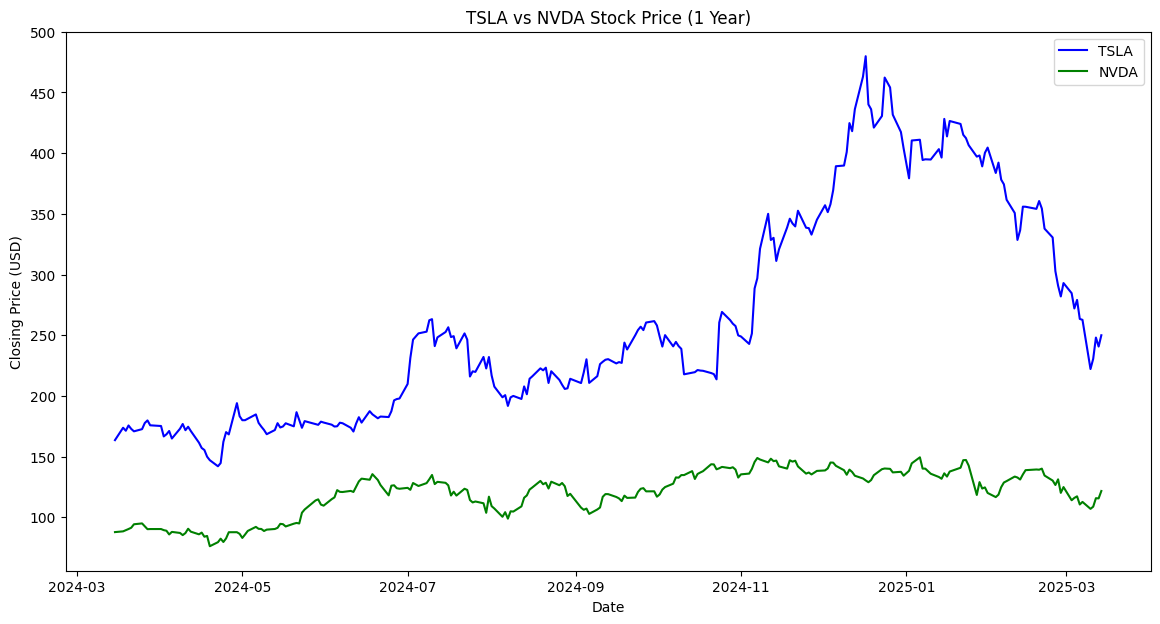

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download stock data for TSLA and NVDA
tsla = yf.Ticker("TSLA")
nvda = yf.Ticker("NVDA")

# Get historical market data
tsla_hist = tsla.history(period="1y")
nvda_hist = nvda.history(period="1y")

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(tsla_hist.index, tsla_hist['Close'], label='TSLA', color='blue')
plt.plot(nvda_hist.index, nvda_hist['Close'], label='NVDA', color='green')

# Add title and labels
plt.title('TSLA vs NVDA Stock Price (1 Year)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()

# Show the plot
plt.show()